In [2]:
#首先导入所需的包
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

#%matplotlib inline

#导入训练集和测试集
train = pd.read_csv('E:\\data\\二手车\\used_car_train_20200313.csv',sep=' ',engine='python')
test = pd.read_csv('E:\\data\\二手车\\used_car_testA_20200313.csv',sep=' ',engine='python')
print(train.shape)
print(test.shape)

(150000, 31)
(50000, 30)


In [3]:
#展示测试集的前几行
print(train.head())

   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer    ...          v_5       v_6       v_7       v_8       v_9  \
0       12.5    ...     0.235676  0.101988  0.129549  0.022816  0.097462   
1       15.0    ...     0.264777  0.121004  0.135731  0.026597  0.020582   
2       12.5    ...     0.251410  0.114912  0.165147  0.062173  0.027075   
3       15.0    ...     0.274293  0.110300  0.121964  0.033395  0.000000   
4        5.0    ...     0.228036  0.073205  0.091880  0.078819  0.121534   

       v_10      v_11      v_12      v_13      v_14  
0 

In [4]:
#列出测试集的列别
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [5]:
print(test.head())

   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0  150000   66932  20111212  222.0      4       5.0       1.0      1.0    313   
1  150001  174960  19990211   19.0     21       0.0       0.0      0.0     75   
2  150002    5356  20090304   82.0     21       0.0       0.0      0.0    109   
3  150003   50688  20100405    0.0      0       0.0       0.0      1.0    160   
4  150004  161428  19970703   26.0     14       2.0       0.0      0.0     75   

   kilometer    ...          v_5       v_6       v_7       v_8       v_9  \
0       15.0    ...     0.264405  0.121800  0.070899  0.106558  0.078867   
1       12.5    ...     0.261745  0.000000  0.096733  0.013705  0.052383   
2        7.0    ...     0.260216  0.112081  0.078082  0.062078  0.050540   
3        7.0    ...     0.260466  0.106727  0.081146  0.075971  0.048268   
4       15.0    ...     0.250999  0.000000  0.077806  0.028600  0.081709   

       v_10      v_11      v_12      v_13      v_14  
0 

In [5]:
test.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

In [6]:
##删除异常值
#包装了一个异常值处理的代码，可以随时调用
def outliers_proc(data,col_name,scale=3):
    '''
    用于清洗异常值，默认用box_plot（scale=3）进行清洗
    :param data: 接收pandas数据格式
    :param col_name: pandas列名
    :param scale: 尺度
    :return:
    '''
    def box_plot_outliers(data_ser,box_scale):
        '''
        利用箱线图去除异常值
        :param data_ser: 接收pandas.Series数据格式
        :param box_scale: 箱线图尺度
        :return:
        '''
        iqr=box_scale * (data_ser.quantile(0.75)-data_ser.quantile(0.25))
        val_low=data_ser.quantile(0.25)-iqr
        val_up=data_ser.quantile(0.75)+iqr
        rule_low=(data_ser<val_low)
        rule_up=(data_ser>val_up)
        return (rule_low,rule_up),(val_low,val_up)
    data_n=data.copy()
    data_series=data_n[col_name]
    rule,value=box_plot_outliers(data_series,box_scale=scale)
    index=np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print('delete number is :{}'.format(len(index)))
    data_n=data_n.drop(index)
    data_n.reset_index(drop=True,inplace=True)
    print('now colunmn number is:{}'.format(data_n.shape[0]))
    index_low=np.arange(data_series.shape[0])[rule[0]]
    outliers=data_series.iloc[index_low]
    print('description of data less than the lower bound is:')
    print(pd.Series(outliers).describe())
    index_up=np.arange(data_series.shape[0])[rule[1]]
    outliers=data_series.iloc[index_up]
    print('description of data larger than the upper bound is:')
    print(pd.Series(outliers).describe())

    fig,ax=plt.subplots(1,2,figsize=(10,7))
    sns.boxplot(y=data[col_name],data=data,palette='Set1',ax=ax[0])
    sns.boxplot(y=data_n[col_name],data=data_n,palette='Set1',ax=ax[1])
    return data_n

In [7]:
#我们可以删掉一些异常数据，以power为例
#这里删不删可以自己判断
#注意：test数据不能删

#train=outliners_proc(train,'power',scale=3)

In [8]:
##特征构造
#训练集和测试集放在一起，方便构造特征
train['train']=1
test['train']=0
data=pd.concat([train,test],ignore_index=True,sort=False)

In [9]:
#使用时间：data['creatDate']-data['regData'],反应汽车使用时间，一般来说价格与使用时间呈反比
#不过要注意，数据里有时间出错的格式，所以需要error=‘coerce’
data['used_time']=(pd.to_datetime(data['creatDate'],format='%Y%M%d',errors='coerce')-
                            pd.to_datetime(data['regDate'],format='%Y%M%d',errors='coerce')).dt.days

In [10]:
#看一下空数据，有15K个样本的时间是有问题的，我们可以选择删除也可以选择不删除
#但是这里不建议删除，因为删除确实数据占总样本量过大，7.5%
#我们可以先放着，因为如果我们采用XGBoost之类的决策树，其本身就能处理缺失值，所以可以先不用管
data['used_time'].isnull().sum()

0

In [11]:
#从邮编中提取城市信息，因为是德国的数据，所以参考德国的邮编，相当于加入了先验知识
data['city']=data['regionCode'].apply(lambda x:str(x)[:-3])

In [12]:
#计算某品牌的销售统计量，同学们还可以计算其他特征的统计量
#这里离要以train的数据计算统计量
train_gb = train.groupby('brand')
all_info={}
for kind,kind_data in train_gb:
    info={}
    kind_data=kind_data[kind_data['price']>0]
    info['brand_amount']=len(kind_data)
    info['brand_price_max']=kind_data.price.max()
    info['brand_price_median']=kind_data.price.median()
    info['brand_price_min']=kind_data.price.min()
    info['brand_price_sum']=kind_data.price.sum()
    info['brand_price_std']=kind_data.price.std()
    info['brand_price_average']=round(kind_data.price.sum()/(len(kind_data)+1),2)
    all_info[kind]=info

brand_fe=pd.DataFrame(all_info).T.reset_index().rename(columns={"index":"brand"})
data=data.merge(brand_fe,how='left',on='brand')

In [13]:
#数据分桶 以power为例
#这时候我们的缺失值也进桶了
#为什么要做数据分桶呢,原因有很多
# 1.离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2.离散后的特征对异常值更具鲁棒性，如age>30为1，否则为0，对于年龄为200的也不会对模型造成很大的干扰；
# 3.LR属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相对于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4.离散后特征可以进行特征交叉，提升表达能力，由M+N个变量编程M*N个变量，进一步引入了非线性，提升了表达能力；
# 5.特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

#当然还有很多其他原因，lightGBM在改进XGBoost时就增加了数据分桶，增强了模型的泛化性
bin=[i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'],bin,labels=False)
print(data[['power_bin','power']].head())

   power_bin  power
0        5.0     60
1        NaN      0
2       16.0    163
3       19.0    193
4        6.0     68


In [14]:
#利用好了，就可以删掉原始数据了
data=data.drop(['creatDate','regDate','regionCode'],axis=1)


In [15]:
print(data.shape)
data.columns

(200000, 39)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train', 'used_time',
       'city', 'brand_amount', 'brand_price_average', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_std',
       'brand_price_sum', 'power_bin'],
      dtype='object')

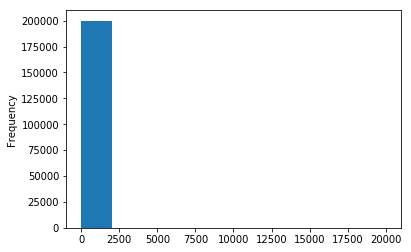

In [16]:
#目前的数据其实已经可以给树模型使用了，所以我们导出一下
data.to_csv('data_for_tree.csv',index=0)

#我们可以再构造一份特征给LR NN之类的模型用
#之所以分开构造是因为，不同模型对数据集的要求不同
#首先看下数据的分布
data['power'].plot.hist()

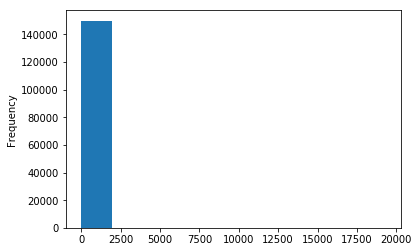

In [17]:
#我们刚刚已经对train进行了异常值处理了，但是现在还有这么奇怪的分布是因为test中的power异常值
#所以我们其实刚刚train中的power异常值不删为好，可以用长尾分布截断来代替
train['power'].plot.hist()

In [18]:
# 我们对其取log,再做归一化
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler
data ['power']=np.log(data['power']+1)
data['power']=((data['power']-np.min(data['power']))/(np.max(data['power'])-np.min(data['power'])))


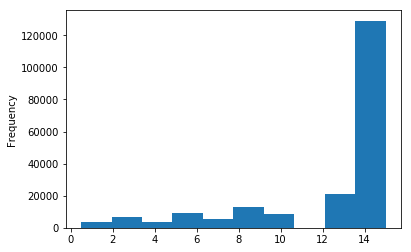

In [19]:
# km的比较正常，应该是已经做出了分桶
data['kilometer'].plot.hist()

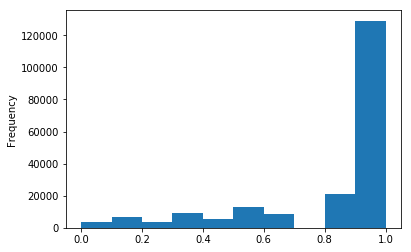

In [20]:
# 所以我们可以直接归一化
data['kilometer']=((data['kilometer']-np.min(data['kilometer']))/
                   (np.max(data['kilometer'])-np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [21]:
# 除此之外，还有我们刚刚构造的统计量特征：
# ‘brand_amount’,'brand_price_average','brand_price_max',
# 'brand_price_median','brand_price_min','brand_price_std',
# ‘brand_price_sum'
# 这里不再一一举例分析，直接做变换
def max_min(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))
data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount']))/
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) /
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) /
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) /
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) /
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) /
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))


In [22]:
#对类别特征进行oneencoder
data=pd.get_dummies(data,columns=['model','brand','bodyType','fuelType',
                                  'gearbox','notRepairedDamage','power_bin'])


In [23]:
print(data.shape)
data.columns

(200000, 370)


Index(['SaleID', 'name', 'power', 'kilometer', 'seller', 'offerType', 'price',
       'v_0', 'v_1', 'v_2',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=370)

In [30]:
#这份数据可以给LR用
data.to_csv('data_for_lr.csv',index=0)

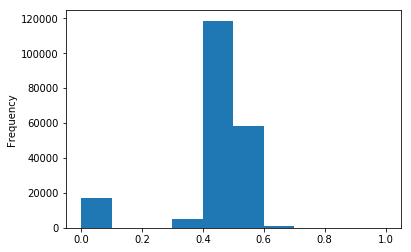

In [31]:
#我们可以再构造一份特征给LR NN之类的模型用
#之所以分开构造是因为，不同模型对数据集的要求不同
#首先看下数据的分布
data['power'].plot.hist()

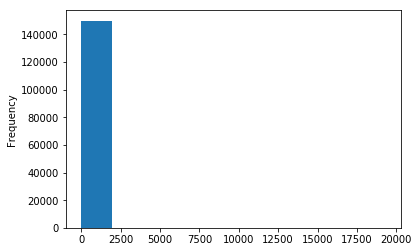

In [33]:
#我们刚刚已经对train进行了异常值处理了，但是现在还有这么奇怪的分布是因为test中的power异常值
#所以我们其实刚刚train中的power异常值不删为好，可以用长尾分布截断来代替
train['power'].plot.hist()

In [34]:
# 我们对其取log,再做归一化
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler
data ['power']=np.log(data['power']+1)
data['power']=((data['power']-np.min(data['power']))/(np.max(data['power'])-np.min(data['power'])))


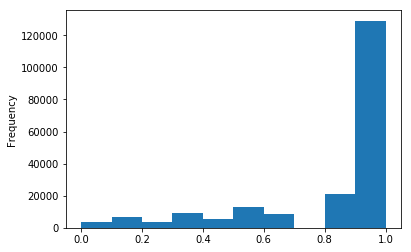

In [35]:
# km的比较正常，应该是已经做出了分桶
data['kilometer'].plot.hist()

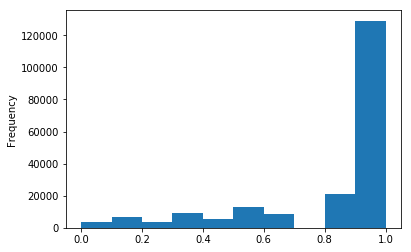

In [36]:
# 所以我们可以直接归一化
data['kilometer']=((data['kilometer']-np.min(data['kilometer']))/
                   (np.max(data['kilometer'])-np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [37]:
# 除此之外，还有我们刚刚构造的统计量特征：
# ‘brand_amount’,'brand_price_average','brand_price_max',
# 'brand_price_median','brand_price_min','brand_price_std',
# ‘brand_price_sum'
# 这里不再一一举例分析，直接做变换
def max_min(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))
data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount']))/
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) /
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) /
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) /
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) /
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) /
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))


In [3]:
#对类别特征进行oneencoder
#data=pd.get_dummies(data,columns=['model','brand','bodyType','fuelType',
 #                                 'gearbox','notRepairedDamage','power_bin'])


In [39]:
print(data.shape)
data.columns

(200000, 370)


Index(['SaleID', 'name', 'power', 'kilometer', 'seller', 'offerType', 'price',
       'v_0', 'v_1', 'v_2',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=370)

In [40]:
#这份数据可以给LR用
data.to_csv('data_for_lr.csv',index=0)


In [41]:
##特征筛选
#1.过滤式

#相关性分析
print(data['power'].corr(data['price'],method='spearman'))
print(data['kilometer'].corr(data['price'],method='spearman'))
print(data['brand_amount'].corr(data['price'],method='spearman'))
print(data['brand_price_average'].corr(data['price'],method='spearman'))
print(data['brand_price_max'].corr(data['price'],method='spearman'))
print(data['brand_price_median'].corr(data['price'],method='spearman'))


0.5773425426332196
-0.4097783640876424


0.05438301230221679
0.38875954584355615


0.2587402623951201
0.39159165603497703


In [2]:
#也可以直接看图
#data_numeric=data[['power','kilometer','brand_amount','brand_price_average',
 #                  'brand_price_max','brand_price_median']]
#correlation=data_numeric.corr()

#f,ax=plt.subplot(figsize=(7,7))
#plt.title('correlation of numeric features with price',y=1,size=16)
#sns.heatmap(correlation,square=True,vmax=0.8)